In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
print(tf.__version__)

2.10.1


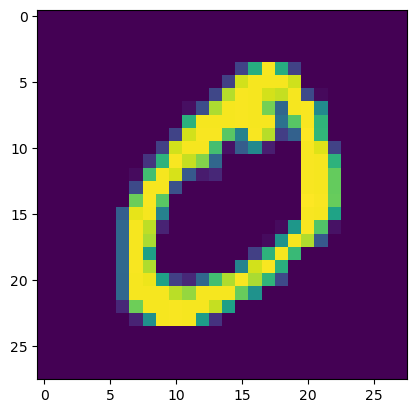

In [3]:
data = tf.keras.datasets.mnist
(train_value, train_key), (test_value, test_key) = data.load_data()
plt.imshow(train_value[1])

In [4]:
train_key = tf.one_hot(train_key.astype(np.int32), depth=10)
test_key = tf.one_hot(test_key.astype(np.int32), depth=10)


In [5]:
# normalize dataset
input_shape = (28, 28, 1)
train_value = train_value.reshape(train_value.shape[0], train_value.shape[1], train_value.shape[2], 1)
train_value = tf.cast(train_value, tf.float32) / 255.

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5,5), padding='same'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.5),
                                    tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-10), loss='categorical_crossentropy', metrics=['acc'])

In [7]:
fitted = model.fit(train_value, train_key, batch_size=64, epochs=10, validation_split=.1)

Epoch 1/10
844/844 [==============================] - 23s 26ms/step - loss: 0.2076 - acc: 0.9369 - val_loss: 0.0566 - val_acc: 0.9840
Epoch 2/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0873 - acc: 0.9746 - val_loss: 0.0540 - val_acc: 0.9855
Epoch 3/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0720 - acc: 0.9788 - val_loss: 0.0467 - val_acc: 0.9880
Epoch 4/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0623 - acc: 0.9814 - val_loss: 0.0484 - val_acc: 0.9895
Epoch 5/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0559 - acc: 0.9836 - val_loss: 0.0477 - val_acc: 0.9880
Epoch 6/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0495 - acc: 0.9854 - val_loss: 0.0398 - val_acc: 0.9890
Epoch 7/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0457 - acc: 0.9864 - val_loss: 0.0491 - val_acc: 0.9885
Epoch 8/10
844/844 [==============================] - 22s 26ms

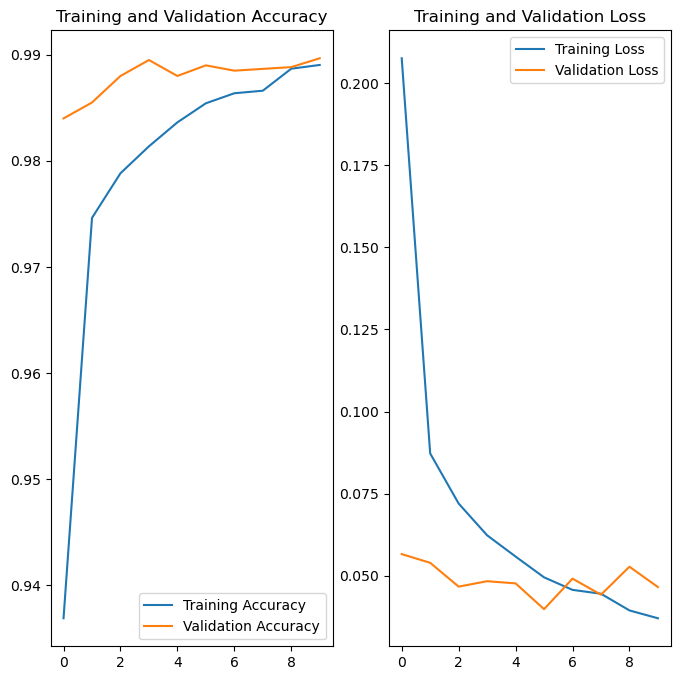

In [8]:
# Retrieve the accuracy and loss values from the fitted history
if 'accuracy' in fitted.history:
    acc = fitted.history['accuracy']
    val_acc = fitted.history['val_accuracy']
else:
    acc = fitted.history['acc']
    val_acc = fitted.history['val_acc']

loss = fitted.history['loss']
val_loss = fitted.history['val_loss']

epochs_range = range(len(acc))

# Plot the accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


1875/1875 [==============================] - 10s 6ms/step


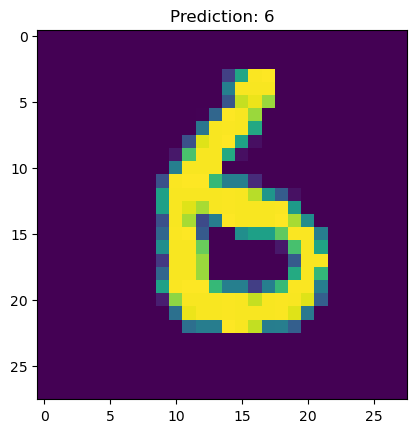

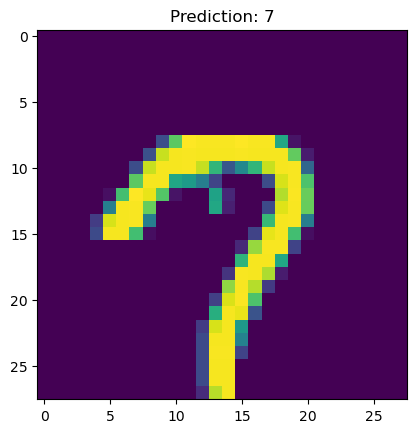

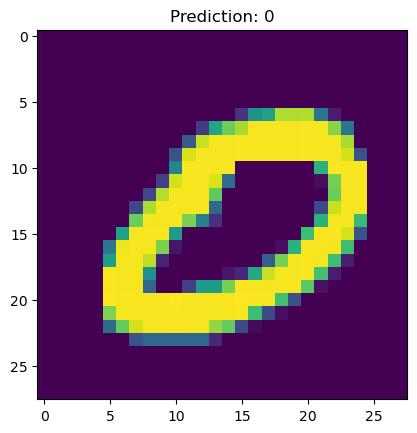

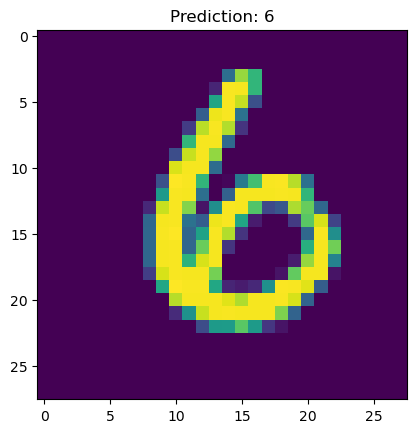

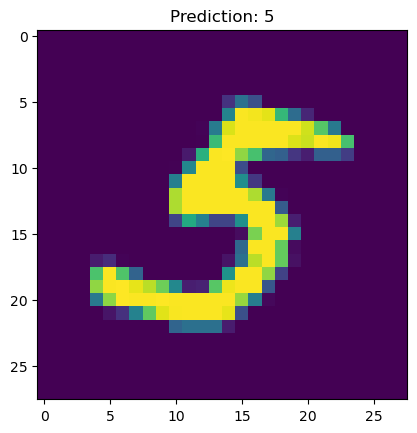

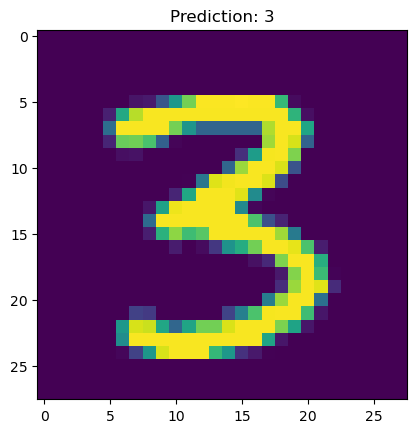

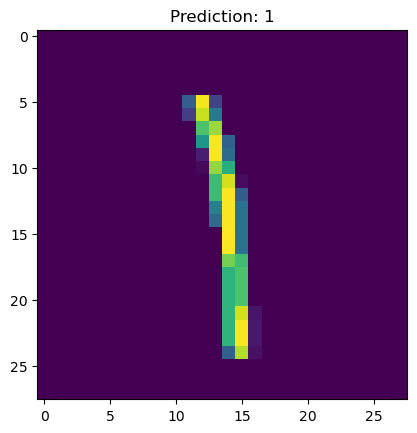

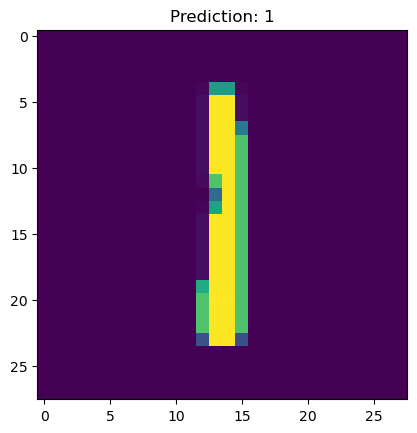

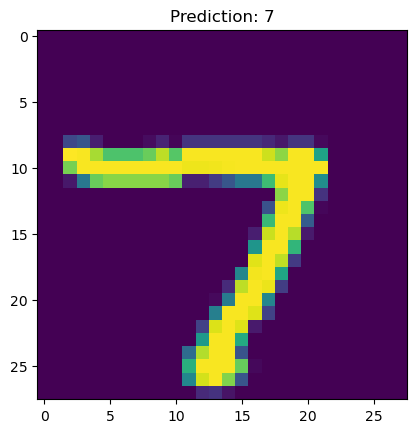

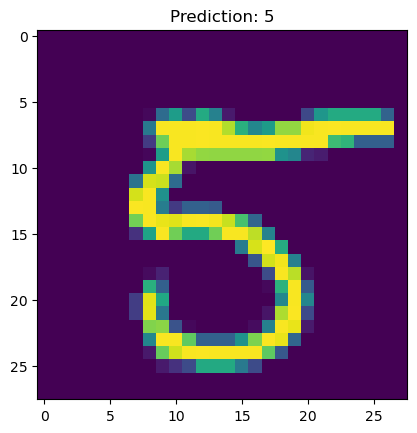

In [9]:
import matplotlib.pyplot as plt
predictions = model.predict([train_value])
# Assuming you have 'predictions' and 'train_value' arrays available

# Generate an array of random indices
random_indices = np.random.randint(0, len(predictions), size=10)

# Iterate over the random indices and print predictions with corresponding images
for index in random_indices:
    prediction = np.argmax(predictions[index])
    plt.imshow(train_value[index])
    plt.title(f"Prediction: {prediction}")
    plt.show()

